<a href="https://colab.research.google.com/github/rdsmaia/dim0494/blob/main/autoencoder_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 56.8 kB/s eta 0:00:000:0100:01
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 391.3 kB/s eta 0:00:00 0:00:01
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB ? eta 0:00:00 0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 47.2 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 17.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3

In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 117.3 kB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 37.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 159.1 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 385.2 kB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 119.2 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [143]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

print("Path to dataset files:", path)

100%|██████████| 435M/435M [00:20<00:00, 22.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3


In [144]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

DATASET_PATH = '/root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/'
TRAIN_DIR = os.path.join(DATASET_PATH, 'tom_and_jerry')
GROUND_TRUTH_CSV = os.path.join(DATASET_PATH, 'ground_truth.csv')
IMG_HEIGHT = 28
IMG_WIDTH = 28
BATCH_SIZE = 256
EPOCHS = 20

data_df = pd.read_csv(GROUND_TRUTH_CSV)

data_df['filepath'] = data_df['filename'].apply(lambda x: os.path.join(TRAIN_DIR, x))

In [145]:
data_df

,filename,tom,jerry,filepath
0,frame0.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
1,frame1.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
2,frame2.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
3,frame3.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
4,frame4.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
...,...,...,...,...
5473,frame5473.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
5474,frame5474.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
5475,frame5475.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...
5476,frame5476.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...


In [146]:
def create_label(row):
    if row['tom'] == 1 and row['jerry'] == 1:
        return 'both'
    elif row['tom'] == 1:
        return 'tom'
    elif row['jerry'] == 1:
        return 'jerry'
    else:
        return 'none'

data_df['label'] = data_df.apply(create_label, axis=1)

In [147]:
data_df[data_df['label'] == 'both']

,filename,tom,jerry,filepath,label
18,frame18.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
101,frame101.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
102,frame102.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
103,frame103.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
107,frame107.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
...,...,...,...,...,...
5445,frame5445.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
5446,frame5446.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
5447,frame5447.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both
5448,frame5448.jpg,1,1,/root/.cache/kagglehub/datasets/balabaskar/tom...,both


In [148]:
def find_file_recursive(filename):
    for root, _, files in os.walk(TRAIN_DIR):
        if filename.lower() in map(str.lower, files):
            return os.path.join(root, filename)
    return None


data_df['filepath'] = data_df['filename'].apply(find_file_recursive)


data_df = data_df[data_df['filepath'].notnull()]

num_classes = data_df['label'].nunique()

# Membuat mapping label ke indeks
unique_labels = sorted(data_df['label'].unique())
class_indices = {label: idx for idx, label in enumerate(unique_labels)}
idx_to_class = {idx: label for label, idx in class_indices.items()}

In [150]:
data_df

,filename,tom,jerry,filepath,label
0,frame0.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
1,frame1.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
2,frame2.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
3,frame3.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
4,frame4.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
...,...,...,...,...,...
5473,frame5473.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
5474,frame5474.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
5475,frame5475.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none
5476,frame5476.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none


In [151]:
data_df['label_idx'] = data_df['label'].map(class_indices
                                            )

In [152]:

data_df

,filename,tom,jerry,filepath,label,label_idx
0,frame0.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
1,frame1.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
2,frame2.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
3,frame3.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
4,frame4.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
...,...,...,...,...,...,...
5473,frame5473.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
5474,frame5474.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
5475,frame5475.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2
5476,frame5476.jpg,0,0,/root/.cache/kagglehub/datasets/balabaskar/tom...,none,2


In [153]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Parâmetros
image_size = (IMG_HEIGHT, IMG_WIDTH)  # ou o tamanho da imagem que você quiser

# Função para carregar e converter imagens
def load_images(filepaths, target_size):
    images = []
    for path in filepaths:
        img = load_img(path, target_size=target_size, color_mode='grayscale')  # mude o color_mode se quiser RGB
        img = img_to_array(img) #/ 255.0  # normaliza os pixels - DEPOIS
        images.append(img)
    return np.array(images)

# Separando em treino e teste
train_paths, test_paths, train_labels, test_labels = train_test_split(
    data_df['filepath'], data_df['label_idx'], test_size=0.2, random_state=42, stratify=data_df['label_idx']
)

# Carregando imagens
x_train = load_images(train_paths, image_size)
x_test = load_images(test_paths, image_size)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
# Load MNIST data
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [154]:
x_train.shape #x_train.shape = (num_imagens, altura, largura)

# O dataset MNIST tem 60000 imagens de treino e 10000 imagens de teste
# as imagens tem 28 de altura e 28 de largura

(4382, 28, 28, 1)

In [119]:
x_train.shape

(4382, 28, 28, 1)

In [155]:
# Normalize data: pixels between 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# como o máximo é 255 (que indica que o pixel é totalmente BRANCO), dividimos por ele
# para que os dados estejam normalizados (entre 0 e 1)

In [156]:
x_train.shape

(4382, 28, 28, 1)

In [122]:
len(x_train)

4382

In [123]:
x_train.shape

(4382, 28, 28, 1)

In [124]:
x_test.shape

(1096, 28, 28, 1)

In [157]:
# flatten images: from 2D to 1D #PARA CAMADAS DENSAS - AUTOENCODERS DENSOS QUE RECEBEM VETORES 1D E NÃO MATRIZES 2D
_, width, height,_ = x_train.shape
x_train = x_train.reshape((len(x_train), width, height,1))
x_test = x_test.reshape((len(x_test), width, height,1))
print(x_train.shape)
print(x_test.shape)

# Passa as imagens por uma camada Flatten() considerando que agora as imagens serão reshapadas para dimunir a dimensão de 2D para 1D
# isto é, ao invés de ser uma matrix 28x28, se tornará uma lista com 784 (28 vezes 28) elementos

(4382, 28, 28, 1)
(1096, 28, 28, 1)


In [158]:
# create a validation set: take data from the train set
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y_train)

# cria um validation set do dataset de treino.
# o random state é um número aleatório que garante que o mesmo conjunto de dados seja gerado toda vez que o código for executado.
# como estamos utilizando 20% do dataset, para que se mantenha o mesmo conjunto nós setamos essa seed random_state
# stratify garante que a proporção entre as classes seja mantida.

In [159]:
x_val.shape

(877, 28, 28, 1)

In [160]:
x_train.shape #foi tirado 20% do dataset de treino para o dataset de validação

(3505, 28, 28, 1)

In [161]:
# Define dimensions: input and latent
input_dim = x_train.shape[1]
latent_dim = 64  # You can try 32, 128, etc.

#latente_dim é a dimensão do espaço latente, ou seja, o número de neurônios na camada latente.
# O espaço latente é a representação comprimida dos dados de entrada, onde as características mais importantes são mantidas.


In [162]:
input_dim

28

In [163]:
# Model

# Encoder
encoder = keras.Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Flatten(),
        Dense(latent_dim, activation='relu')
    ])

# Decoder
decoder = keras.Sequential(
    [
        Input(shape=(latent_dim,)),
       # Camada densa para expandir o vetor latente para uma imagem "achatada"
        Dense(7 * 7 * 128, activation='relu'),  # Aqui, usamos a dimensionalidade 7x7 para expandir
        Reshape((7, 7, 128)),  # Reorganizamos para (7, 7, 128), que são 128 filtros em uma imagem 7x7

    # Camada Conv2DTranspose
        Conv2DTranspose(128, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),  # Expande a imagem de 7x7 para 14x14

        Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),  # Expande de 14x14 para 28x28

    # Finalmente, gerar a imagem reconstruída de 28x28
        Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')  # Camada final para reconstrução

  ])

# Autoencoder model: encoder and decoder in sequence
autoencoder = keras.Sequential([encoder, decoder])

autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_27 (Sequential)      │ (None, 64)             │       494,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_28 (Sequential)      │ (None, 28, 28, 1)      │       629,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,123,777 (4.29 MB)

 Trainable params: 1,123,777 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

In [164]:
# hyperparameters
batch_size = 256
epochs = 50
learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
loss = 'mse'

In [165]:
# Compile model
autoencoder.compile(
    optimizer=Adam(
    learning_rate=learning_rate,
    beta_1=beta1,
    beta_2=beta2,
    epsilon=epsilon),
    loss='mse')

In [139]:
x_train.shape

x_train = x_train.reshape((len(x_train), IMG_HEIGHT, IMG_WIDTH, 1))

In [141]:
x_val.shape
x_val = x_val.reshape((len(x_val), IMG_HEIGHT, IMG_WIDTH, 1))

In [166]:
# Train model
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_val, x_val)
                          )

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 475ms/step - loss: 0.0812 - val_loss: 0.0545
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0530 - val_loss: 0.0480
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0433 - val_loss: 0.0313
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0295 - val_loss: 0.0259
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0245 - val_loss: 0.0222
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0217 - val_loss: 0.0223
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0208 - val_loss: 0.0194
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0188 - val_loss: 0.0183
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0179 - val_loss: 0.0177
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0174 - val_loss: 0.0171
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0

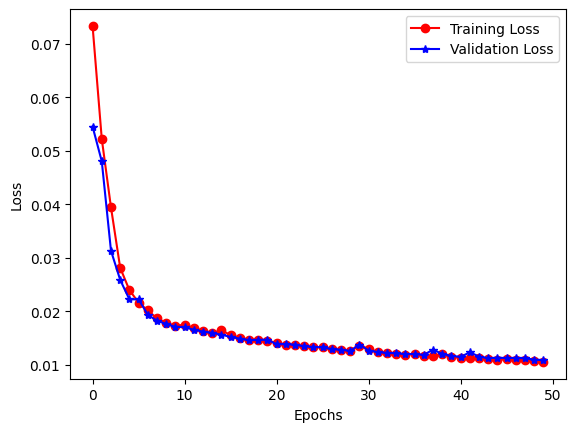

In [167]:
# observe the learning curves
plt.plot(history.history['loss'], 'r-o', label='Training Loss')
plt.plot(history.history['val_loss'], 'b-*', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


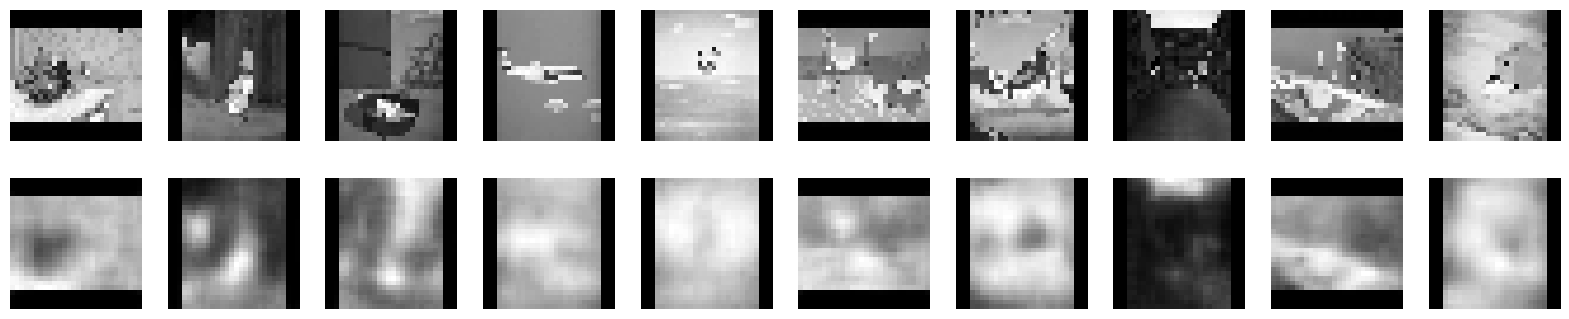

In [168]:
# Testing the model

# from images to latents
latents = encoder.predict(x_test)

# from latents to reconstructed images
x_test_hat = decoder.predict(latents)

# Plot original and reconstructed
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):

    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_hat[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


In [169]:
# observing the latent space: just the first 2 dimensions: we will use t-SNE
from sklearn.manifold import TSNE
latents_2D = TSNE(n_components=2).fit_transform(latents)

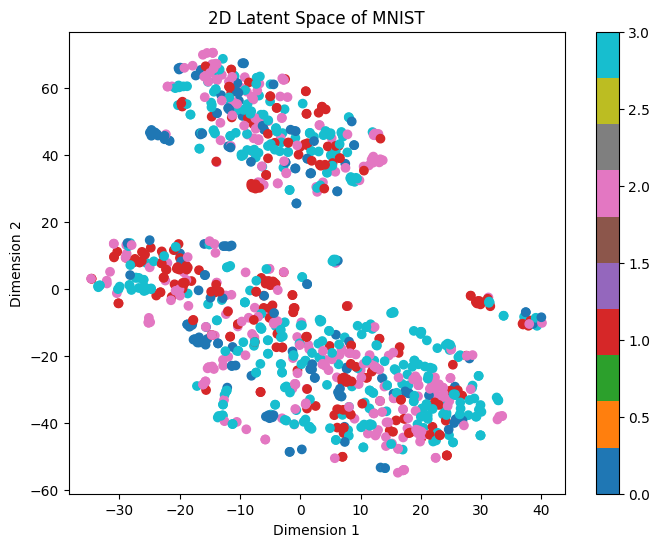

In [170]:
# plotting the 2D latents with corresponding labels
plt.figure(figsize=(8, 6))
plt.scatter(latents_2D[:, 0], latents_2D[:, 1], c=y_test, cmap='tab10')  # use true labels if available
plt.colorbar()
plt.title("2D Latent Space of MNIST")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()